<a href="https://colab.research.google.com/github/yanikal/python-project/blob/main/FlippedClassroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Charts/Graph

A bar chart is a very popular visualization tool. 
It is a type of plot where the length of each bar is proportional to the value of the item that it represents. 

Use
To compare the values of a variable at a given point in time that means one axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

## Example:

### About the data set:


===============================================================
####DATA PROVIDED BY: Guido Imbens, PhD 
####                  UCLA, Department of Economics
===============================================================


=============================
#### BRIEF DESCRIPTION OF THE DATA          
=============================
The data were collected by a team of five interviewers at the 16th Annual 
Twins Day Festival in Twinsburg, Ohio, in August 1991. A booth was set up at the festival's main entrance, and an ad inviting all adult twins to participate in the survey was placed in the festival program. In addition, the interviews roamed the festival grounds, approaching all adult twins for an interview, and almost every pair of twins accepted. 

========================
#### HOW TO USE THE DATA FILE
========================
The data file is comma delimited text. Note:  within a pair of twins, individuals were randomly assigned to be twin 1 or twin 2.

Missing data are indicated by a period.

AGE...........Age in years

TWINPAIR......Identification number for a pair of twins

TWINID........Identifies twin 1 or 2 within a pair

HWAGE.........Hourly wage 

EDUC..........Years of education

WHITEH........1 if twin 2 is white, 0 otherwise.

MALEH.........1 if twin 2 is male, 0 otherwise.

WHITEL........1 if twin 1 is white, 0 otherwise.

MALEL.........1 if twin 1 is male, 0 otherwise.

## Questions:
-- what is the biggest age group in the data set?

-- What is the ratio of boy/girl twins in the data set?

-- Do the twins have the same level of education?

In [ ]:
# importing library
import pandas as pd
import seaborn as sns

In [ ]:
# Reading dataset
df = pd.read_csv('http://courses.washington.edu/b517/Datasets/TWINS.csv')

#### 1. Data Cleaning

In [ ]:
# Check null Values
df.isna().sum()

twinpair     0
twinid       0
age          0
whiteh       0
maleh        0
whitel       0
malel        0
hwage       43
educ         0
dtype: int64

In [ ]:
df[2:].describe()

,twinpair,twinid,age,whiteh,maleh,whitel,malel,hwage,educ
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,321.000000,364.000000
mean,92.500000,1.500000,38.723921,0.934066,0.461538,0.939560,0.461538,13.940840,13.934066
std,52.610398,0.500688,13.047908,0.248508,0.499205,0.238627,0.499205,13.757791,3.045304
min,2.000000,1.000000,18.781660,0.000000,0.000000,0.000000,0.000000,1.666667,1.000000
25%,47.000000,1.000000,28.900750,1.000000,0.000000,1.000000,0.000000,7.000000,12.000000
50%,92.500000,1.500000,36.058865,1.000000,0.000000,1.000000,0.000000,10.875000,13.000000
75%,138.000000,2.000000,44.848730,1.000000,1.000000,1.000000,1.000000,16.000000,16.000000
max,183.000000,2.000000,79.123890,1.000000,1.000000,1.000000,1.000000,149.519300,26.000000


In [ ]:
df.head()

,twinpair,twinid,age,whiteh,maleh,whitel,malel,hwage,educ
0,1,1,33.25120,1,0,1,0,8.68,16
1,1,2,33.25120,1,0,1,0,11.25,16
2,2,1,54.05339,1,0,1,0,7.85,8
3,2,2,54.05339,1,0,1,0,NaN,9
4,3,1,43.57016,1,0,1,0,8.75,26


In [ ]:
df['age'] = df['age'].round()

In [ ]:
df.head()

,twinpair,twinid,age,whiteh,maleh,whitel,malel,hwage,educ
0,1,1,33.0,1,0,1,0,8.68,16
1,1,2,33.0,1,0,1,0,11.25,16
2,2,1,54.0,1,0,1,0,7.85,8
3,2,2,54.0,1,0,1,0,NaN,9
4,3,1,44.0,1,0,1,0,8.75,26


In [ ]:
df['twinpair'].nunique()

183

In [ ]:
df.groupby(['twinpair']).sum()

,twinid,age,whiteh,maleh,whitel,malel,hwage,educ
twinpair,,,,,,,,
1,3,66.0,2,0,2,0,19.93000,32
2,3,108.0,2,0,2,0,7.85000,17
3,3,88.0,2,0,2,0,26.75000,45
4,3,62.0,2,2,2,2,32.81000,24
5,3,70.0,2,2,2,2,26.46540,28
...,...,...,...,...,...,...,...,...
179,3,92.0,2,0,2,0,39.06779,24
180,3,52.0,2,2,2,2,19.65000,32
181,3,80.0,2,0,2,0,7.85000,30


#### 1. what is the biggest age group in the data set?


In [ ]:
# Creating a extra column with a label to group the age in 3 categories which are '18-39', '40-59', '60-79'
df['age_group'] = pd.cut(df['age'], 3, labels = ['18-39', '40-59', '60-79'] )

<Axes: >

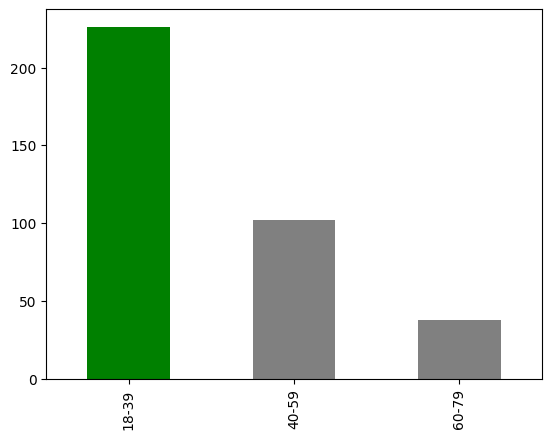

In [ ]:
# Plot the age categories
df['age_group'].value_counts().plot(kind='bar', color=['green', 'grey', 'grey'])

##### 2. What is the ratio of boy/girl twins in the data set?

In [ ]:
# group the data set by twins pair
df_gender = df[['twinpair','maleh','malel']].drop_duplicates(subset=['twinpair','maleh','malel'])
df_gender['same_sex'] = (df_gender['maleh'] == df_gender['malel'])

In [ ]:
df_gender['maleh'].value_counts()

0    99
1    84
Name: maleh, dtype: int64

<Axes: >

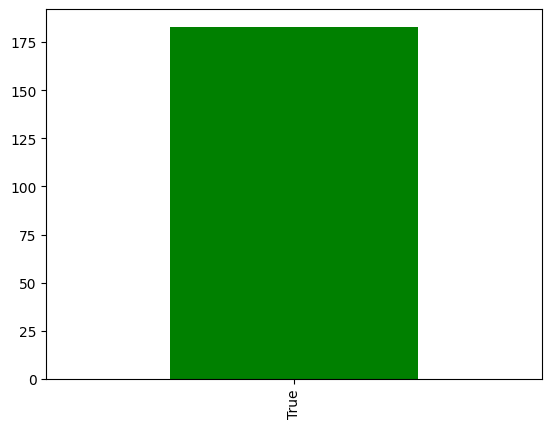

In [ ]:
df_gender['same_sex'].value_counts().plot(kind='bar', color=['green', 'grey'])

#### 3. Do the twins have the same level of education?

<Axes: xlabel='educ'>

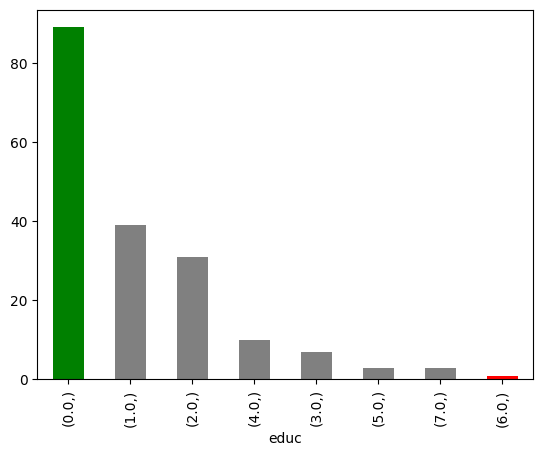

In [ ]:
df_diff_educ = df[['twinpair','educ','hwage']].groupby(['twinpair'])[['educ']].diff().dropna().abs()
df_diff_educ.value_counts().plot(kind='bar', color=['green', 'grey', 'grey' , 'grey' ,'grey', 'grey', 'grey' ,'red'])